#### AFAD 분석
##### 파일 크기가 너무 커서 서버에서 진행

In [1]:
import os
import pandas as pd
from PIL import Image

In [20]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

In [22]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [3]:
def load_afad_split_dataset(folder_path):
    data = []
    valid_exts = ('.jpg', '.jpeg', '.png')

    for fname in os.listdir(folder_path):
        if not fname.lower().endswith(valid_exts):
            continue

        try:
            parts = fname.split('_')
            if len(parts) < 3:
                continue  # 파일명 형식 이상 예외 처리

            gender = 'female' if parts[0] == 'F' else 'male'
            age = int(parts[1])
            path = os.path.join(folder_path, fname)

            # 이미지 열어서 손상 여부 검사
            with Image.open(path) as img:
                img.verify()

            data.append({'gender': gender, 'age': age, 'path': path})

        except Exception as e:
            print(f" 손상된 이미지: {fname} - {e}")

    return pd.DataFrame(data)

In [ ]:
df1 = load_afad_split_dataset("data/AFAD_unzipped/split/train")
df1.head()

,gender,age,path
0,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
1,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
2,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
3,male,70,/workspace/data/AFAD_unzipped/split/train/M_70...
4,male,70,/workspace/data/AFAD_unzipped/split/train/M_70...


In [5]:
print("총 이미지 수:", len(df1))

총 이미지 수: 132400


In [ ]:
df2 = load_afad_split_dataset("data/AFAD_unzipped/split/val")
df2.head()

,gender,age,path
0,male,72,/workspace/data/AFAD_unzipped/split/val/M_72_m...
1,male,70,/workspace/data/AFAD_unzipped/split/val/M_70_S...
2,male,70,/workspace/data/AFAD_unzipped/split/val/M_70_0...
3,male,69,/workspace/data/AFAD_unzipped/split/val/M_69_W...
4,male,69,/workspace/data/AFAD_unzipped/split/val/M_69_m...


In [7]:
print("총 이미지 수:", len(df2))

총 이미지 수: 33101


In [8]:
# 둘을 하나의 DataFrame으로 결합
df = pd.concat([df1, df2], ignore_index=True)
print(f"총 이미지 수: {len(df)}")
df.head()

총 이미지 수: 165501


,gender,age,path
0,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
1,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
2,male,72,/workspace/data/AFAD_unzipped/split/train/M_72...
3,male,70,/workspace/data/AFAD_unzipped/split/train/M_70...
4,male,70,/workspace/data/AFAD_unzipped/split/train/M_70...


#### 나이 분포 확인

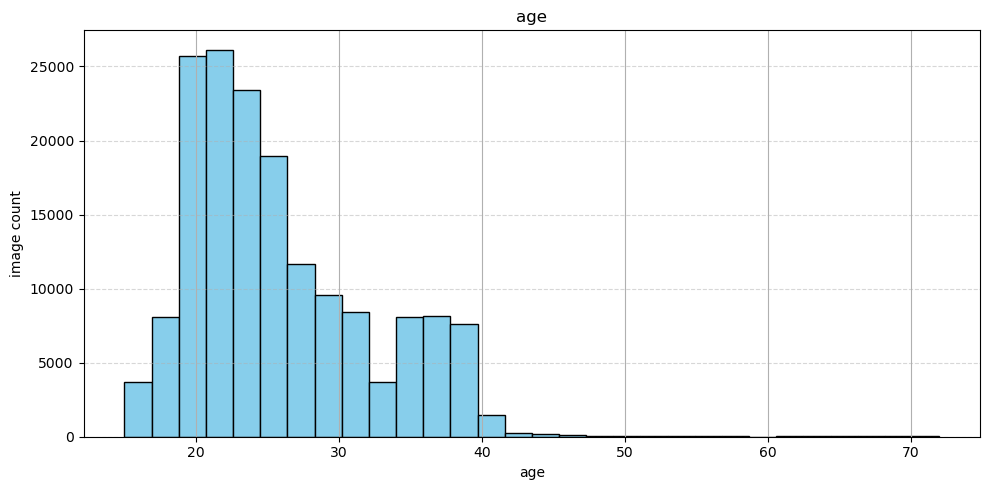

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df["age"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("age")
plt.xlabel("age")
plt.ylabel("image count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
age_counts = df["age"].value_counts().sort_index()
print(age_counts)

age
15     1251
16     2423
17     2482
18     5585
19    12477
20    13232
21    12560
22    13572
23    10510
24    12891
25    11261
26     7676
27     6481
28     5170
29     4730
30     4806
31     4456
32     3996
33     3701
34     3856
35     4246
36     4234
37     3898
38     3798
39     3791
40     1335
41      114
42      146
43      118
44       94
45       65
46       59
47       49
48       48
49       30
50       28
51       30
52       23
53       40
54       27
55       12
56       16
57       11
58       12
59        7
60        6
61        8
62       25
63        8
64        8
65        9
66       16
67       10
68        7
69       15
70        7
72       35
Name: count, dtype: int64


#### 성별 분포

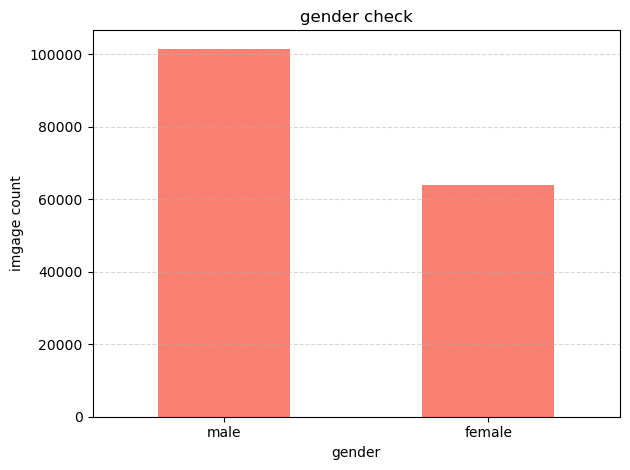

In [12]:
df["gender"].value_counts().plot(kind='bar', color='salmon')
plt.title("gender check")
plt.xlabel("gender")
plt.ylabel("imgage count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
df["gender"].value_counts()

gender
male      101519
female     63982
Name: count, dtype: int64

In [14]:
print(df.columns)

Index(['gender', 'age', 'path'], dtype='object')
